In [1]:
%matplotlib inline
from matplotlib.pyplot import *
from numpy import *

# Méthodes numériques 

## TD n° 1 - Interpolation polynomiale

### Exercice 1

1) On considère les abscisses $x = \left[ -2, 0, 1, 2 \right]$ et $y = \left[ 4, 0, 0 ,4 \right]$. Parmi les polynômes suivants, lequel est le polynôme d'interpolation aux points $x,y$ (justifiez votre réponse) ?

- $\displaystyle p_1(x) = x^4 - \frac{2}{3} x^3 - 3\, x^2 + \frac{8}{3} x$
- $\displaystyle p_2(x) = \frac{4}{3}x^2 - \frac{4}{3}$
- $\displaystyle p_3(x) = \frac{1}{3}x^3 + x^2 - \frac{4}{3} x$

2) Représentez sur une même figure les points d'interpolation, ainsi que les polynômes $p_1$, $p_2$ et $p_3$ respectivement en noir, vert et rouge, sur l'intervalle $[-2.5, 2.5]$.

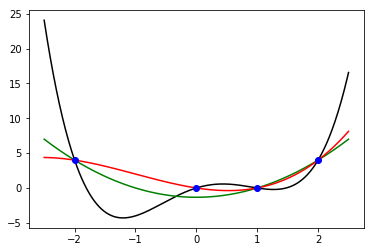

In [2]:
Xint = [-2,0,1,2]
Yint = [4,0,0,4]
XX = linspace(-2.5,2.5,500)
P1 = XX**4 - 2*XX**3/3 - 3*XX**2 + 8*XX/3
P2 = 4*XX**2/3 - 4/3.
P3 = XX**3/3 + XX**2 - 4*XX/3
plot(XX,P1,'k',XX,P2,"g",XX,P3,"r",Xint,Yint,"bo")
show()

### Exercice 2

1) Montrez qu'il existe une infinité de polynômes de degré 2 dont le graphe passe par les points $(0,0)$ et $(1,0)$.

2) Montrez qu'il n'existe pas de polynôme de degré 2 passant par les points $(0,1)$, $(1,4)$, $(2,15)$ et
$(3,40)$.

### Exercice 3

1) Calculez les polynômes d'interpolation aux points suivants :

a) $x = [-1,2,3]$ et $y = [4,4,8]$ 

b) $x = [-2, -1, 0 , 1]$ et $y = [0, -2, -4, 0]$

c) $x = [-1,0,1,2]$ et $y = [6,2,0,0]$

d) $x = [-1,0,1]$ et $y = [1,0,1]$

e) $x = [-3,-1,2,10]$ et $y = [-3,-1,2,10]$

2) Représentez graphiquement les polynômes des points a) et b), accompagnés des points d'interpolation correspondant.

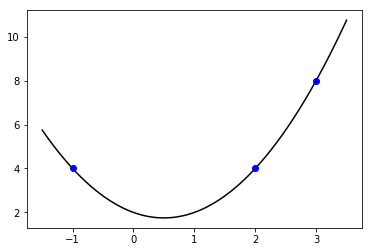

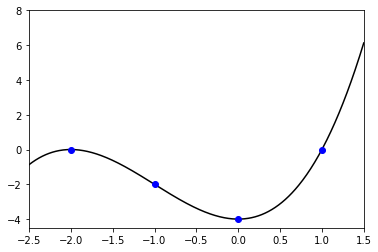

In [3]:
Xint = [-1,2,3]
Yint = [4,4,8]
XX = linspace(-1.5,3.5,500)
YY = XX**2 - XX + 2
plot(XX,YY,"k",Xint,Yint,'bo')
Xint = [-2,-1,0,1]
Yint = [0,-2,-4,0]
XX = linspace(-2.5,1.5,500)
YY = (XX+2)**2*(XX-1)
figure()
plot(XX,YY,"k",Xint,Yint,'bo')
axis([-2.5,1.5,-4.5,8])
show()

### Exercice 4

Soit $p$ un polynôme. Montrez que son polynôme d'interpolation aux nœuds $x_i \in \mathbb{R}$, $0 \leq i \leq n$, est égal au reste de la division euclidienne de $p$ par le polynôme $\pi_n(x) = (x-x_0) \, (x-x_1) \ldots (x-x_n)$.

### Exercice 5

 Pour $(x_0,\ldots, x_n) \in \mathbb{R}^{n+1}$, on considère la matrice
$
\displaystyle V(x_0,\ldots,x_n) = \begin{bmatrix} 
1 & x_0 & x_0^2 & \ldots & x_0^n \\
1 & x_1 & x_1^2 & \ldots & x_1^n \\
\vdots & \ddots & \ddots & \ddots & \vdots \\
\vdots & \ddots & \ddots & \ddots & \vdots \\
1 & x_n & x_n^2 & \ldots  & x_n^n
\end{bmatrix}
$.

1) Montrez que $\displaystyle det(V(x_0,\ldots , x_n) ) = \prod_{(i,j),\ 0 \leq i < j \leq n} (x_j - x_i)$.

2) Soit $(y_0, \ldots , y_n) \in \mathbb{R}^n$. Montrez qu'il existe un unique polynôme $p \in \mathbb{R}^n$
tel que $p(x_i) = y_i$ si et seulement si $x_i \neq x_j$ pour tout $(i,j), i \neq j$.

3) Écrire un programme `PolIntLag(Xint,Yint)` qui calcule les coefficients dans la base canonique de $\mathbb{R}^n$
du polynôme d'interpolation de Lagrange aux points $X_{int} = (x_0,\ldots, x_n)$ et $Y_{int} = (y_0, \ldots, y_n)$,
en utilisant la matrice $V$.

In [6]:
def PolIntLag(Xint,Yint):
    N = Xint.size
    Coef = zeros([N,1])
    V = zeros([N,N])
    for kk in range(N):
        V[:,kk] = Xint**kk
    Coef = linalg.solve(V, Yint)
    return Coef
    
    
Xint = array([0,1,-1])
#Xint = random.rand(1,3)
Yint = array([0,2,-2])
#Yint = random.rand(1,3)
C = PolIntLag(Xint,Yint)
print(C)

[ 0.  2.  0.]


4) Écrire une fonction `EvalPol(Xpol,Coef)` qui retourne l'ensemble des valeurs prises par le polynôme $p(x) = Coef[0] + Coef[1] \,x + Coef[2] \, x^2 + \ldots + Coef[n]\, x^n$ aux points de $X_{pol} = (X_0, \ldots, X_M)$.

In [1]:
def EvalPol(Xpol,Coef):
    N = Coef.size
    Ypol = zeros(Xpol.shape)
    for kk in range(N):
        Ypol = Ypol + Coef[kk]*Xpol**kk
    return Ypol
Xpol = linspace(amin(Xint)-0.5,amax(Xint)+0.5)
plot(Xint,Yint,'bo',Xpol,EvalPol(Xpol,C),'k')
show()

NameError: name 'linspace' is not defined

### Exercice 6

Trouvez et représentez graphiquement le polynôme $p$ de degré inférieur ou égal à 4 tel que

a) $p(-2) = 11$, $p(-1) = 1$, $p(0) = 1$, $p(1) = 5$, $p(2) = 31$

b) $p(-1) = 1$, $p'(-1) = -1$, $p(0) = 0$, $p(1) = 1$, $p'(1) = 1$.

[ 1.  1.  1.  1.  1.]


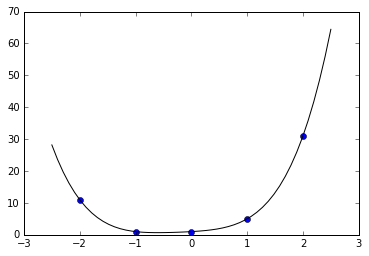

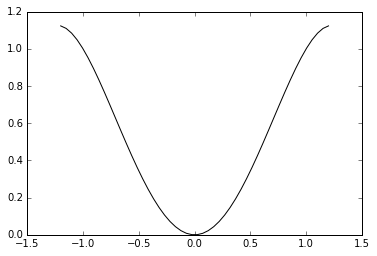

In [6]:
Xint = array([-2,-1,0,1,2])
Yint = array([11,1,1,5,31])
C = PolIntLag(Xint,Yint)
print(C)
Xpol = linspace(amin(Xint)-0.5,amax(Xint)+0.5)
plot(Xint,Yint,'bo',Xpol,EvalPol(Xpol,C),'k')
show()
Xpol = linspace(-1.2,1.2)
Ypol = -Xpol**4/2. + 3*Xpol**2/2
figure()
plot(Xpol,Ypol,'k')
show()

### Exercice 7

Soit $x_0,\ldots, x_n$ (n+1) réels distincts deux à deux. Pour $k \in \left\lbrace 0, \ldots, n \right\rbrace$, on
note 
$$
L_k(x) = \prod_{j \in \left\lbrace 0, \ldots , n \right\rbrace, j \neq k} \frac{x-x_j}{x_k-x_j}
$$
le $k$-ième polynôme de Lagrange.

1) Montrez que $L_k$ est un polynôme de degré $n$ vérifiant $L_k(x_i) = \delta_{k i}$ pour tout $k, \ i \in 
\left\lbrace 0, \ldots , n \right\rbrace$.

2) En déduire que la famille de polynôme $\left\lbrace L_k \right\rbrace_{k \in \left\lbrace 0, \ldots , n \right\rbrace}$ forme une base de $\mathbb{R}_n[X]$.

3) Écrire une fonction `PolLagrange(Xpol,Xint,k)` qui calcule les valeurs prises par le $k$-ième polynôme de la base de Lagrange associé aux abscisses $X_{int} = (x_0, \ldots , x_n)$, en les points $X_{pol} = (X_0, \ldots , X_M)$.

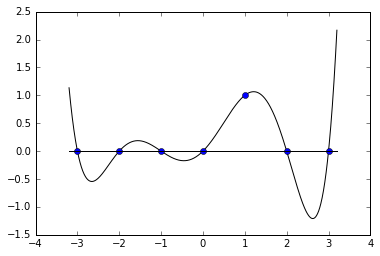

In [6]:
def PolLagrange(Xpol,Xint,k):
    # ici, 0 <= k <= Xint.size-1
    Ypol = ones(Xpol.shape)
    for jj in concatenate((arange(k),arange(k+1,Xint.size))):
        Ypol = Ypol*(Xpol-Xint[jj])/(Xint[k]-Xint[jj])
    return Ypol
    
   

Xint = array([-3,-2,-1,0,1,2,3])
Xpol = linspace(-3.2,3.2,1000)
k = 4
YLag= zeros(Xint.shape)
YLag[k] = 1
plot(Xpol,PolLagrange(Xpol,Xint,k),'k',Xint,YLag,'bo',Xpol,zeros(Xpol.shape),'k')
show()

4) Écrire une fonction `PolIntLag2(Xpol,Xint,Yint)` qui calcule les valeurs prises aux points $X_{pol} = (X_0, \ldots, X_M)$ par le polynôme d'interpolation de Lagrange aux abscisses $X_{int} = (x_0, \ldots, x_n)$ et
$Y_{int} = (y_0, \ldots, y_n)$.

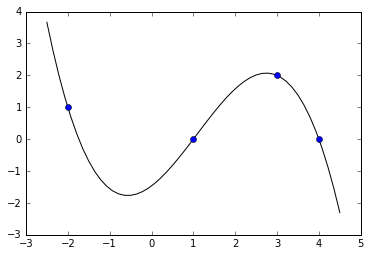

In [7]:
def PolIntLag2(Xpol,Xint,Yint):
    Ypol = zeros(Xpol.shape)
    for kk in arange(Xint.size):
        Ypol = Ypol + Yint[kk]*PolLagrange(Xpol,Xint,kk)
    return Ypol

Xint = array([-2,1,4,3])
Yint= array([1,0,0,2])
Xpol = linspace(-2.5,4.5)
plot(Xpol,PolIntLag2(Xpol,Xint,Yint),'k',Xint,Yint,'ob')
show()

### Exercice 8 (examen 2016)

Soient $x_0  = 0 < x_1 < \ldots < x_n$ et des réels donnés $y_i$, $0 \leq i \leq n$. On considère le polynôme d'interpolation satisfaisant 
$$
P(x_0) = y_0, \quad P(-x_i) = P(x_i) = y_i, 1 \leq i \leq n.
$$

1) Montrez que le polynôme $P$ est pair. *Indication : on pourra écrire $P$ dans la base de Lagrange*

2) En déduire en un minimum de calcul le polynôme d'interpolation vérifiant 
$
P(-1) = 2$, $P(0) = 4$, $P(1) = 2
$.

### Exercice 9 (examen 1999)

1) Calculez le polynôme d'interpolation de Lagrange de la fonction $f(x) = x\, (x^2-1)$ relativement aux points $x_0 = -1$, $x_1 = 1$ et $x_2 = 2$.

2) Même question en rajoutant le point $x_3 = -2$.

### Exercice 10 (partiel 2003)

1) Rappelez l’expression de la base de Newton de $\mathbb{R}_5[X]$ associée aux noeuds 1, 2, 3, 4, 5, 6. 

2) Montrez qu’il s’agit bien d’une base.

3) Donnez, dans cette base, l’expression du polynôme $P \in \mathbb{R}_5[X]$ tel que
$P(1) = P(6) = 1$ et $P(2) = P(3) = P(4) = P(5) = 0$. 

4) Calculez $P(0)$.

5) Représentez graphiquement ce polynôme sur le segment $[0,7]$, ainsi que les points d'interpolation.

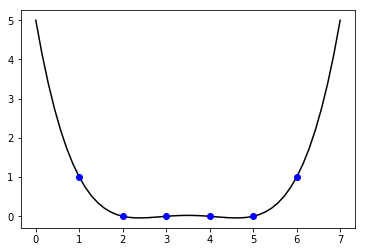

In [8]:
Xpol = linspace(0,7)
Ypol = 1 -(Xpol - 1)+ (Xpol - 1)*(Xpol-2)/2 - (Xpol - 1)*(Xpol-2)*(Xpol-3)/6 + (Xpol-1)*(Xpol-2)*(Xpol - 3)*(Xpol - 4)/24
Xint = array([1,2,3,4,5,6])
Yint = array([1,0,0,0,0,1])
plot(Xpol,Ypol,'k',Xint,Yint,'ob')
show()

### Exercice 11 (partiel 2014)

Étant donnés six réels $x_1$, $a$, $b$, $c$, $d$ et $e$, on considère le tableau de différences divisées suivant :

<table WIDTH=500 HEIGHT=100> 
<tr> <th > $x_k$ </th> <th > $f[x_k]$ </th> <th > $f[x_k,x_{k+1}]$ </th>  <th > $f[x_k,\ldots,x_{k+2}]$ </th>
<th > $f[x_0,x_1, x_2,x_{3}]$ </th> </tr>
<tr> <td  > $x_0 = 0$  <br />  <br /> $x_1$  <br />  <br /> $x_2 = -1$   <br />  <br /> $x_3 = 2$ </td> 
<td>  $1$  <br />  <br /> $-1$  <br />  <br /> $0$   <br />  <br /> $a$ </td>
<td>   $1$ <br />  <br /> $b$ <br />  <br /> $c$ <br />  </td>
<td>  <br />  <br />  $d$ <br />  <br /> $e$ <br />  <br /></td>
<td>  <br />  <br /> <br />  <br />$ \displaystyle \frac{2}{3}$ <br />  <br /><br />  <br /> </td>
</tr>
</table>
 
1) Calculez $x_1$, $a$, $b$, $c$, $d$ et $e$.

2) Donnez, dans la base de Newton, le polynôme $P_3$ qui interpole $(0,1)$, $(x_1,-1)$, $(-1,0)$ et $(2,a)$.

3) On considère les fonctions suivantes définies sur $\mathbb{R}$ :
$$
f_1 : x \mapsto \left\lbrace
\begin{array}{cc}
2 + 9\, x^2 & \text{ si } x \geq 0 \\
0 & \text{ sinon}
\end{array}
\right.
, \qquad 
f_2 : x \mapsto \left\lbrace
\begin{array}{cc}
0 & \text{ si } x \geq -1 \\
-3\, x^2 - x^3 & \text{ sinon}
\end{array}
\right. .
$$
Pour $\alpha$ et $\beta$ deux réels, on définit la fonction $f : x \in \mathbb{R} \mapsto \alpha \, f_1(x) + \beta\, f_2(x)$. Montrez que $P_3$ est le polynôme d'interpolation de $f$ en $x_0$, $x_1$, $x_2$ et $x_3$ si et seulement si 
$\alpha = \frac{1}{2}$ et $\beta = \frac{1}{4}$.

À partir de maintenant, on pose $\alpha = \frac{1}{2}$ et $\beta = \frac{1}{4}$.

4) Calculez dans la base de Newton le polynôme $P_4$ qui interpole les points $(0,1)$, $(x_1,-1)$, $(-1,0)$, $(2,a)$
et $(1,6)$. $P_4$ est-il le polynôme d'interpolation à $f$ en $0$, $x_1$, $-1$, $2$ et $1$ ?

### Exercice 12

Soit $p_n$ le polynôme d’interpolation de la fonction $x \mapsto \sin(x)$ relativement aux noeuds $x1 , \ldots,xn$ pris deux à deux distincts dans un intervalle fermé borné $[a, b]$, $a < b$.

1. Montrez que pour tout $x \in \left[a, b \right]$,
$$
\left\vert p_n(x) - \sin(x) \right\vert \leq \frac{(b-a)^n }{n! }.
$$

2. En déduire que la suite $(p_n)$ converge vers la fonction $\sin(x)$ uniformément sur $[a, b]$.

3. Application numérique : on prend $a = 0$ et $b = 2\, \pi$. Représentez sur un même graphique la fonction $\sin(x)$
et le polynôme d'interpolation à cette fonction en $n$ points choisis aléatoirement entre $0$ et $2\, \pi$, pour
$n = 3$, $6$, $9$ et $12$.

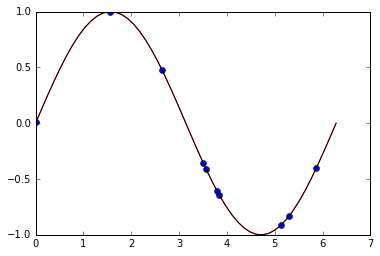

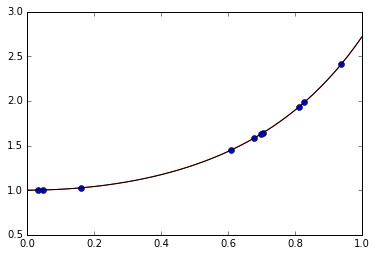

In [11]:
n = 10
Xint = 2*pi*random.random([n,1])
Yint = sin(Xint)
Xplot = linspace(0,2*pi)
plot(Xplot,sin(Xplot),'r',Xint,Yint,'ob',Xplot,PolIntLag2(Xplot,Xint,Yint),'k')
show()

Xint = random.random([n,1])
Yint = exp(Xint**2)
Xplot = linspace(0,1)
plot(Xplot,exp(Xplot**2),'r',Xint,Yint,'ob',Xplot,PolIntLag2(Xplot,Xint,Yint),'k')
show()

### Exercice 13

On considère $a = x_0 < x_1 < \ldots < x_n = b$ et le polynôme d’interpolation tel que $P_n(x_i)= e^{x_i}$, $0\leq i \leq n$.
Montrer que la suite de polynômes d’interpolation $P_n$ converge uniformément vers la fonction exponentielle lorsque
$n$ tend vers l'infini.

### Exercice 14

On considère la fonction $ \displaystyle f : x \in \mathbb{R} \mapsto \frac{1}{1+25\, x^2}$.

1) On choisit, pour interpoler la fonction $f$, $n$ abscisses equidistribuées sur $[-1,1]$. Tracez sur un même graphique, sur $[-1,1]$, la fonction $f$, les points d'interpolation et le polynôme d'interpolation correspondant, pour $n = 5$, $10$, $15$ et $20$. Que remarquez-vous ?

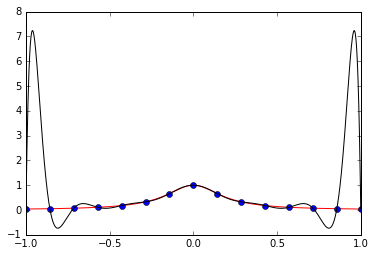

In [11]:
n = 15
Xint = linspace(-1,1,n)
Yint = 1/(1+25*Xint**2)
Xplot = linspace(-1,1,1000)
plot(Xplot,1/(1+25*Xplot**2),'r',Xint,Yint,'ob',Xplot,PolIntLag2(Xplot,Xint,Yint),'k')
show()

2) Même question, mais cette fois en choisissant $X_{int} = (x_0,\ldots, x_n)$ avec $\displaystyle x_i = \cos\left(\pi\frac{i}{n}\right)$, $i = 0 , \ldots, n$. Que remarquez-vous ?

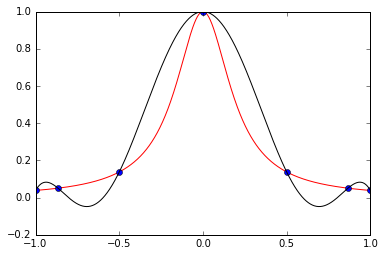

[ 0.          0.16666667  0.33333333  0.5         0.66666667  0.83333333
  1.        ]
[ 0.          0.16666667  0.33333333  0.5         0.66666667  0.83333333
  1.        ]


In [17]:
n = 6
ii = arange(n+1)
Xint = cos(pi*ii/n)
Yint = 1/(1+25*Xint**2)
Xplot = linspace(-1,1,1000)
plot(Xplot,1/(1+25*Xplot**2),'r',Xint,Yint,'ob',Xplot,PolIntLag2(Xplot,Xint,Yint),'k')
show()
print(linspace(0,n,n+1)/n)
print(arange(n+1)/n)

### Exercice 15

On reprend la fonction $f$ de l'exercice précédent. On voit que si on ne choisit pas correctement les abscisses d'interpolation sur $[-1,1]$, des oscillations apparaissent (phénomêne de Runge), et le polynôme d'interpolation ne converge pas vers la fonction $f$.

Pour contrer cela, on se propose non plus de faire de l'interpolation polynomiale, mais de l'interpolation polynomiale par morceau, c'est-à-dire :

  - on découpe l'intervalle $[-1,1]$ en $N$ sous-intervalles de même longueur
  - sur chaque sous-intervalle, on interpole la fonction $f$ en utilisant $n$ abscisses équidistribuées
  
Écrire un programme dessinant la fonction $f$ et son interpolé par morceaux. Le tester pour différentes valeurs de $N$ et $n$.

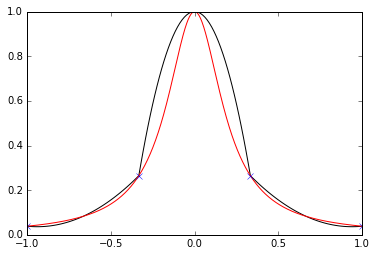

In [13]:
N = 3
n = 3
X = linspace(-1,1,N+1)
delta = X[2]-X[1]
for kk in range(N):
    Xint = linspace(X[kk],X[kk+1],n)
    Yint = 1/(1+25*Xint**2)
    Xplot = linspace(X[kk],X[kk+1])
    plot(Xplot,PolIntLag2(Xplot,Xint,Yint),'k')
Xplot = linspace(-1,1,1000)
plot(Xplot,1/(1+25*Xplot**2),'r',X,1/(1+25*X**2),'xb')
show()